In [122]:
import sympy as sym
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [123]:
tau, E, l, r_s, phi_0, r_0, M, m, t_n = sym.symbols('tau E l r_s phi_0 r_0 M m t_n')
r_n, phi_n, t, r, theta, phi = sym.symbols('r_n phi_n t r theta phi', cls = sym.Function)

### Newtonian:

In [124]:
r_n = r_n(t_n)
phi_n = phi_n(t_n)

r_n_d = sym.diff(r_n, t_n)
phi_n_d = sym.diff(phi_n, t_n)

r_n_dd = sym.diff(r_n, t_n, t_n)
phi_n_dd = sym.diff(phi_n, t_n, t_n)

In [125]:
diff_r_n = - (1)/(r_n**2) + r_n*(phi_n_d**2)

diff_phi_n = -(2*r_n_d*phi_n_d)/(r_n)

In [126]:
n_dz1dt_f = sym.lambdify((t_n, r_n, r_n_d, phi_n_d), diff_r_n)
n_dz2dt_f = sym.lambdify((t_n, r_n, r_n_d, phi_n_d), diff_phi_n)
n_drdt_f = sym.lambdify(r_n_d, r_n_d)
n_dthetadt_f = sym.lambdify(phi_n_d, phi_n_d)

In [127]:
def dS_ndt(S, t_n):
    r_n, z1, phi_n, z2 = S
    return [n_drdt_f(z1),
           n_dz1dt_f(t_n, r_n, z1, z2),
           n_dthetadt_f(z2),
           n_dz2dt_f(t_n, r_n, z1, z2)]

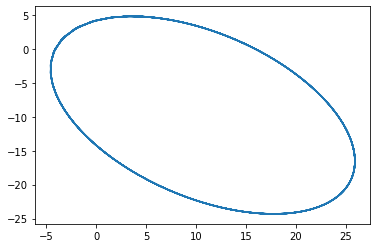

In [129]:
t_n = np.arange(0, 3000, 3)

r0 = 16
dr0 = -0.21
p0 = 0
dp0 = 0.01
S_n_0 = [r0, dr0, p0, dp0]

ans_n = integrate.odeint(func = dS_ndt, y0 = S_n_0 ,t = t_n)

rnd = ans_n.T[0]
drndtd = ans_n.T[1]
phinad = ans_n.T[2]
dphindtd = ans_n.T[3]

def get_xy_data(t_n, rn, phin):
    xt = rn*np.cos(phin)
    yt = rn*np.sin(phin)
    return (xt, yt)
xn, yn = get_xy_data(t, ans_n.T[0], ans_n.T[2])
plt.plot(xn, yn)

### Einstein

In [130]:
t = t(tau)
r = r(tau)
theta = theta(tau)
phi = phi(tau)

t_d = sym.diff(t, tau)
r_d = sym.diff(r, tau)
theta_d = sym.diff(theta, tau)
phi_d = sym.diff(phi, tau)

t_dd = sym.diff(t, tau, tau)
r_dd = sym.diff(r, tau, tau)
theta_dd = sym.diff(theta, tau, tau)
phi_dd = sym.diff(phi, tau, tau)

In [131]:
# Differential Equation for r and phi:

diff_r = - (r_s)/(2*r**2) + r*phi_d**2 - (3/2)*r_s*phi_d**2

diff_phi = -(2*r_d*phi_d)/(r)

We have two differential equations and we wish to convert them to four first order ODE's

Define:

$\dot{r} = z_1$

$\dot{\theta} = z_2$

Our four ODE's are:

$\dot{r} = z_1$

$\dot{z_1} = ...$

$\dot{\theta} = z_2$

$\dot{z_2} = ...$


In [132]:
dz1dt_f = sym.lambdify((tau, r_s, r, r_d, phi_d), diff_r)
dz2dt_f = sym.lambdify((tau, r_s, r, r_d, phi_d), diff_phi)
drdt_f = sym.lambdify(r_d, r_d)
dthetadt_f = sym.lambdify(phi_d, phi_d)

Next, we define $S = (r, z_1, \theta, z_2)$ from which we can differentiate to find:

$$ \frac{dS}{dt} = (\dot{r}, \dot{z_1}, \dot{\theta}, \dot{z_2}) $$

In [133]:
def dSdt(S, tau, r_s):
    r, z1, phi, z2 = S
    return [drdt_f(z1),
           dz1dt_f(tau, r_s, r, z1, z2),
           dthetadt_f(z2),
           dz2dt_f(tau, r_s, r, z1, z2)]

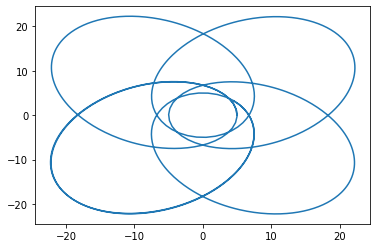

In [135]:
tau = np.arange(0, 3000, 3)

dp_circular = np.sqrt(1/(2*r0 - 3))/r0
delta = 0.219

r_s = 1
r0 = 5
dr0 = 0
p0 = 0
dp0 = dp_circular*(1 + delta)

S_0 = [r0, dr0, p0, dp0]

args = (r_s,)

ans = integrate.odeint(func = dSdt, y0 = S_0 ,t = tau, args = args)

rd = ans.T[0]
drdtd = ans.T[1]
thetad = ans.T[2]
dthetadtd = ans.T[3]

def get_xy_data(t, r, theta):
    xt = r*np.cos(theta)
    yt = r*np.sin(theta)
    return (xt, yt)
x1, y1 = get_xy_data(t, ans.T[0], ans.T[2])
plt.plot(x1, y1)

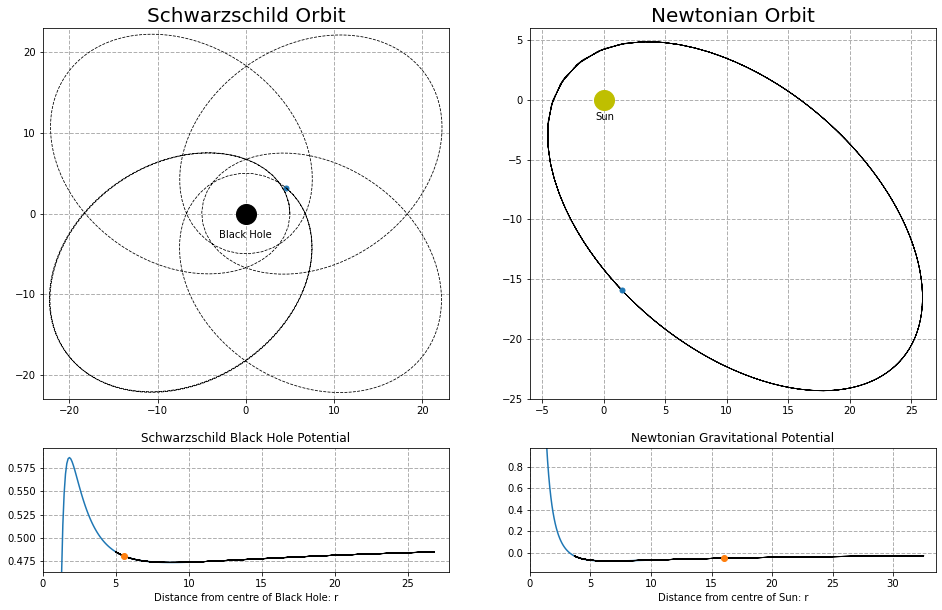

In [178]:
fig, ax = plt.subplots(2, 2, figsize = (16,10), gridspec_kw={'height_ratios': [3, 1]})

# ----- Orbital Motion -----------


ax[0,0].set_facecolor('w')
ax[0,0].get_xaxis()
ax[0,0].get_yaxis()
ax[0,0].set_title('Schwarzschild Orbit', fontsize=20)
ax[0,0].grid(linestyle = '--', linewidth = 1)
ax[0,0].annotate("Black Hole ", (-3, -3))

xdata = []
ydata = []

ln1, = ax[0,0].plot([],[],'o', lw=3, markersize = 5)
ln2, = ax[0,0].plot([],[], '--',color = 'k', lw=0.8,)
ln3, = ax[0,0].plot([],[],'o',color = 'k', lw=3, markersize = 20)

ax[0,0].set_ylim(round(min(y1)) - 1, round(max(y1)) + 1)
ax[0,0].set_xlim(round(min(x1)) - 1, round(max(y1)) + 1)


# ----- Effective Pottential -----

l = (S_0[0]**2)*S_0[3]

x3 = np.linspace(1, 10, 100)
y3 = 1/2 + (l**2/(2*x3**2)) - (r_s)/(2*x3) - (r_s*l**2)/(2*x3**3)

x2 = rd
y2 = 1/2 + (l**2/(2*x2**2)) - (r_s)/(2*x2) - (r_s*l**2)/(2*x2**3)

ax[1,0].set_facecolor('w')
ax[1,0].get_xaxis()
ax[1,0].get_yaxis()
ax[1,0].set_xlabel('Distance from centre of Black Hole: r')
ax[1,0].set_title('Schwarzschild Black Hole Potential')
ax[1,0].grid(linestyle = '--', linewidth = 1)

ax[1,0].plot(x3,y3)

rdata = []
Vdata = []

ax[1,0].set_ylim(min(y2) - 0.01, max(y3) + 0.01)
ax[1,0].set_xlim(0, max(x2) + 1)

ln4, = ax[1,0].plot([], [], color = 'k', lw=1,)
ln5, = ax[1,0].plot([], [], 'o', lw=15,)

# ----- Newtonian ------

ax[0,1].set_facecolor('w')
ax[0,1].get_xaxis()
ax[0,1].get_yaxis()
ax[0,1].set_title('Newtonian Orbit', fontsize=20)
ax[0,1].grid(linestyle = '--', linewidth = 1)
ax[0,1].annotate("Sun", (-0.7, -1.7))

xndata = []
yndata = []

ln7, = ax[0,1].plot([],[], '--',color = 'k', lw=0.8,)
ln6, = ax[0,1].plot([],[],'o', lw=3, markersize = 5)
ln8, = ax[0,1].plot([],[],'o',color = 'y', lw=3, markersize = 20)

ax[0,1].set_ylim(round(min(yn)) - 1, round(max(yn)) + 1)
ax[0,1].set_xlim(round(min(xn)) - 1, round(max(xn)) + 1)

# ----- Newtonian Potential -----

L = (S_n_0[0]**2)*S_n_0[3]

rn1 = np.linspace(1, 10, 100)
vn1 = (L**2)/(2*rn1**2) - 1/(rn1)

rn2 = rnd
vn2 = (L**2)/(2*rn2**2) - 1/(rn2)

ax[1,1].set_facecolor('w')
ax[1,1].get_xaxis()
ax[1,1].get_yaxis()
ax[1,1].set_xlabel('Distance from centre of Sun: r')
ax[1,1].set_title('Newtonian Gravitational Potential')
ax[1,1].grid(linestyle = '--', linewidth = 1)

ax[1,1].plot(xn1,yn1)

rndata = []
Vndata = []

ax[1,1].set_ylim(min(yn1) - 0.1, max(yn2) + 1)
ax[1,1].set_xlim(0, max(xn2) + 1)

ln9, = ax[1,1].plot([], [], color = 'k', lw=1,)
ln10, = ax[1,1].plot([], [], 'o', lw=15,)


def animate(i):
    rdata.append(x2[i])
    Vdata.append(y2[i])
    ln4.set_data(x2,y2)
    ln5.set_data(x2[i], y2[i])
    
    xdata.append(x1[i])
    ydata.append(y1[i])
    ln2.set_data(xdata, ydata)
    ln1.set_data([x1[i]],[y1[i]])
    ln3.set_data([0],[0])
    
    rndata.append(rn2[i])
    Vndata.append(vn2[i])
    ln9.set_data(rn2,vn2)
    ln10.set_data(rn2[i], vn2[i])
    
    xndata.append(xn[i])
    yndata.append(yn[i])
    ln7.set_data(xndata, yndata)
    ln6.set_data([xn[i]],[yn[i]])
    ln8.set_data([0],[0])
    

ani = animation.FuncAnimation(fig, animate, frames = 1000, interval=50)
ani.save('trial.gif', writer = 'pillow', fps = 35)